# Programming Assignment 6 (optional) - Multiclass classification with Neural Nets and Logistic Regression
In this assignment, you will experiment with the widely used MNIST dataset.
The training data consists of greyscale images of handwritten digits, with one digit per image.
The problem is to properly identify the handwritten digit. This is a classification problem with
K=10 classes, corresponding to the digits 0,...,9.

## Step 1
Let's begin by using a modified version of a program that applies multiclass logistic regression to the MNIST dataset, with softmax output.
The original program is available at https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

The program does not use Stochastic Gradient Descent (or ascent), but another optimization method (saga)
that runs faster.  Optimization is easier for logistic regression than for neural nets
because the error function is convex. Stochastic Gradient Descent is generally not used
in logistic regression code.

### Import the necessary libraries and the dataset



In [24]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Modified May 2021 by: Lisa Hellerstein <lisa.hellerstein@nyu.edu>


# Reduce number of samples for faster convergence
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# set random number generator seed to 0 so everyone gets same permutation
random_state = check_random_state(0)

permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# set random state to 0 so everyone gets same train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, random_state = 0, test_size=5000)


Automatically created module for IPython interactive environment


In [25]:
# TODO: 1. Print the shape of X_train and y_train
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', y_train.shape)

Shape of X_train:  (5000, 784)
Shape of X_test:  (5000,)


### Display some example images
You may need to wait a bit for them to appear.

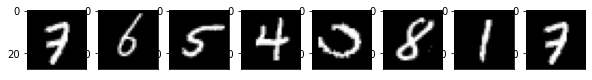

In [26]:

def plt_fig(x):
    plt.imshow(x.reshape((28, 28)), cmap=plt.cm.gray)
    plt.xticks([])

plt.figure(figsize=(10,5))

nplt = 8
for i in range(nplt):    
    plt.subplot(1,nplt,i+1)
    plt_fig(X_train[i])
plt_fig(X_train[0])
plt.show()


### Train the logistic classifier.

Note: When running the code below, you may have to wait a bit before you get
any output.

In [27]:

# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# record current time for runtime
t0 = time.time()

# Turn up tolerance for faster convergence
# Change penalty to l1 for l1 regularization
# Reduce C for more emphasis on regularization
# (LH comment: C is the inverse of what we usually call the penalty parameter.  A low value means more regularizat)ion.
clf = LogisticRegression(
    C=50. / train_samples, penalty='l2', solver='saga', tol=0.1
)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Test accuracy with multiclass logistic regression: %.4f" % score)
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)



Test accuracy with multiclass logistic regression: 0.8742
Example run in 1.505 s


In [28]:
# TODO Compute training accuracy
train_accuracy = clf.score(X_train, y_train)
print('Train Accuracy: ', train_accuracy)

Train Accuracy:  0.8826


### Show the predictions for the first 8 images in the training set, displayed above

In [29]:

clf.predict(X_train[0:8,:])

array(['9', '6', '5', '4', '0', '8', '1', '1'], dtype=object)

### Show the predicted probabilities for each of the classes 

In [30]:
print('Predicted probabilities will be printed in the following order:')
print(clf.classes_)
print('Predicted probabiities for first image in X_train')
print(clf.predict_proba(X_train[0:1,:]))

Predicted probabilities will be printed in the following order:
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Predicted probabiities for first image in X_train
[[0.00297152 0.01011242 0.02003385 0.00571513 0.05548558 0.00192282
  0.0054188  0.17620742 0.02810616 0.69402631]]


<function matplotlib.pyplot.show(close=None, block=None)>

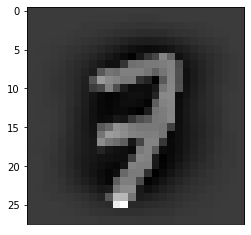

In [32]:
#first image in training set
plt_fig(X_train[0])
plt.show

### Experiment to find answers to the following question:

Ordinarily, it's important to scale the features for logistic regression and neural nets.
But the features in the MNIST dataset are all pixel values, so they aren't that different from each other.
What happens if you don't scale the features in the code above?  Does it affect test accuracy or running time?


### Display a visualization of the learned coefficients
The program also includes a visualization of the learned coefficients. 

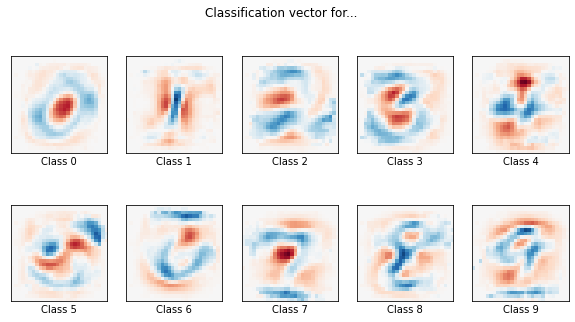

In [13]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

plt.show()



## Step 2
Now let's try a neural net classifier with softmax output and no regularization.
Note: Scikit-learn uses alpha to denote the regularization penalty parameter, and eta to denote the
learning rate. So setting alpha=0 in the paramters to MLPClassifier would mean no regularization.

In [53]:

from sklearn.neural_network import MLPClassifier

t0 = time.time()

# set alpha=0 in the parameter list for MLPClassifier to remove regularization
clfnn = MLPClassifier(solver='sgd', random_state=1, max_iter=1000,hidden_layer_sizes=[200, 50])
clfnn.fit(X_train, y_train)
score = clfnn.score(X_test, y_test)

run_time = time.time() - t0
print("Test score: %.4f" % score)
print('Example run in %.3f s' % run_time)

training_score = clfnn.score(X_train, y_train)
print("Training Score: ", training_score)

Test score: 0.9254
Example run in 33.114 s
Training Score:  1.0


## Step 3
Experiment with the neural net to see the effect of changing the number of hidden layers, number of nodes per layer, 
and other hyperparameters.   Try to increase test accuracy.  

In [61]:
# TODO Code for additional experiments
from sklearn.neural_network import MLPClassifier

t0 = time.time()

# set alpha=0 in the parameter list for MLPClassifier to remove regularization
clfnn = MLPClassifier(solver='sgd', random_state=1, max_iter=1000,hidden_layer_sizes=[10, 10])
clfnn.fit(X_train, y_train)
score = clfnn.score(X_test, y_test)

run_time = time.time() - t0
print("Test score: %.4f" % score)
print('Example run in %.3f s' % run_time)

training_score = clfnn.score(X_train, y_train)
print("Training Score: ", training_score)

Test score: 0.8824
Example run in 17.993 s
Training Score:  0.9938


In [54]:
from sklearn.neural_network import MLPClassifier

for i in [5,10,20,50,100,200]:

    t0 = time.time()

    # set alpha=0 in the parameter list for MLPClassifier to remove regularization
    clfnn = MLPClassifier(solver='sgd', random_state=1, max_iter=1000,hidden_layer_sizes=[i])
    clfnn.fit(X_train, y_train)
    score = clfnn.score(X_test, y_test)

    run_time = time.time() - t0
    print('For ',i,' number of nodes')
    print("Test score: %.4f" % score)
    print('Example run in %.3f s' % run_time)

    training_score = clfnn.score(X_train, y_train)
    print("Training Score: ", training_score)

/Users/marcus/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


For  5  number of nodes
Test score: 0.8276
Example run in 21.408 s
Training Score:  0.9566
For  10  number of nodes
Test score: 0.8916
Example run in 17.303 s
Training Score:  0.989
For  20  number of nodes
Test score: 0.9116
Example run in 16.217 s
Training Score:  0.9974
For  50  number of nodes
Test score: 0.9192
Example run in 18.537 s
Training Score:  0.9984
For  100  number of nodes
Test score: 0.9170
Example run in 25.377 s
Training Score:  0.9988
For  200  number of nodes
Test score: 0.9286
Example run in 37.825 s
Training Score:  0.9992


In [75]:
t0 = time.time()

# set alpha=0 in the parameter list for MLPClassifier to remove regularization
clfnn = MLPClassifier(solver='sgd', random_state=1, max_iter=1000,hidden_layer_sizes=[30,30,30,30,30])
clfnn.fit(X_train, y_train)
score = clfnn.score(X_test, y_test)

run_time = time.time() - t0
print("Test score: %.4f" % score)
print('Example run in %.3f s' % run_time)

training_score = clfnn.score(X_train, y_train)
print("Training Score: ", training_score)

Test score: 0.8890
Example run in 17.307 s
Training Score:  1.0


In [67]:
t0 = time.time()

# set alpha=0 in the parameter list for MLPClassifier to remove regularization
clfnn = MLPClassifier(solver='sgd', random_state=1, max_iter=1000,hidden_layer_sizes=[30,30])
clfnn.fit(X_train, y_train)
score = clfnn.score(X_test, y_test)

run_time = time.time() - t0
print("Test score: %.4f" % score)
print('Example run in %.3f s' % run_time)

training_score = clfnn.score(X_train, y_train)
print("Training Score: ", training_score)

Test score: 0.9174
Example run in 17.272 s
Training Score:  0.9998


In [105]:
t0 = time.time()

# set alpha=0 in the parameter list for MLPClassifier to remove regularization
clfnn = MLPClassifier(alpha = .005,solver='sgd', random_state=1, max_iter=1000,hidden_layer_sizes=[50,30])
clfnn.fit(X_train, y_train)
score = clfnn.score(X_test, y_test)

run_time = time.time() - t0
print("Test score: %.4f" % score)
print('Example run in %.3f s' % run_time)

training_score = clfnn.score(X_train, y_train)
print("Training Score: ", training_score)

Test score: 0.9210
Example run in 17.800 s
Training Score:  0.9998


In [80]:
t0 = time.time()

# set alpha=0 in the parameter list for MLPClassifier to remove regularization
clfnn = MLPClassifier(solver='adam', random_state=1, max_iter=1000,hidden_layer_sizes=[50,30])
clfnn.fit(X_train, y_train)
score = clfnn.score(X_test, y_test)

run_time = time.time() - t0
print("Test score: %.4f" % score)
print('Example run in %.3f s' % run_time)

training_score = clfnn.score(X_train, y_train)
print("Training Score: ", training_score)


#adam speeds it up and increases test score

Test score: 0.9264
Example run in 3.704 s
Training Score:  1.0


In [100]:
t0 = time.time()

# set alpha=0 in the parameter list for MLPClassifier to remove regularization
clfnn = MLPClassifier(solver='sgd', random_state=4, max_iter=1000,hidden_layer_sizes=[50,30])
clfnn.fit(X_train, y_train)
score = clfnn.score(X_test, y_test)

run_time = time.time() - t0
print("Test score: %.4f" % score)
print('Example run in %.3f s' % run_time)

training_score = clfnn.score(X_train, y_train)
print("Training Score: ", training_score)

#logistic activation decreases score

Test score: 0.9236
Example run in 17.243 s
Training Score:  0.9988


In [84]:
t0 = time.time()

# set alpha=0 in the parameter list for MLPClassifier to remove regularization
clfnn = MLPClassifier(solver='lbfgs', random_state=1, max_iter=1000,hidden_layer_sizes=[50,30])
clfnn.fit(X_train, y_train)
score = clfnn.score(X_test, y_test)

run_time = time.time() - t0
print("Test score: %.4f" % score)
print('Example run in %.3f s' % run_time)

training_score = clfnn.score(X_train, y_train)
print("Training Score: ", training_score)


#adam speeds it up and increases test score

Test score: 0.9232
Example run in 1.061 s
Training Score:  1.0


In [107]:
t0 = time.time()

# set alpha=0 in the parameter list for MLPClassifier to remove regularization
clfnn = MLPClassifier(alpha = .005,solver='adam', random_state=1, max_iter=1000,hidden_layer_sizes=[50,30])
clfnn.fit(X_train, y_train)
score = clfnn.score(X_test, y_test)

run_time = time.time() - t0
print("Test score: %.4f" % score)
print('Example run in %.3f s' % run_time)

training_score = clfnn.score(X_train, y_train)
print("Training Score: ", training_score)

Test score: 0.9282
Example run in 3.804 s
Training Score:  1.0
